<a href="https://colab.research.google.com/github/henrykohl/Machine-Learning-demo-repo/blob/master/OnlineLectures/StatQuest/nn-with-pytorch-lightning/building_nns_with_pytorch_and_lightning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lightning --quiet # 注意,這裡安裝的事lightning不是pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 31.4 MB/s eta 0:00:00


# Introduction to Coding Neural Networks with PyTorch + Lightning!!! [(Youtube)](https://www.youtube.com/watch?v=khMzi6xPbuM)

[(Resource Code in lightning.ai)](https://lightning.ai/lightning-ai/studios/statquest-introduction-to-neural-networks-with-pytorch-lightning?view=public&section=all)

[(My own Code in lightning.ai)](https://lightning.ai/henrykohl/vision-model/studios/statquest-introduction-to-neural-networks-with-pytorch-lightning/code)

[(My own Medium)](https://medium.com/p/9afa72644244)
<!-- ## Brought to you by...
[<img src="./images/Brandmark_FullColor_Black.png" alt="Lightning" style="width: 400px;">](https://www.pytorchlightning.ai/) -->

Copyright 2023, Joshua Starmer

----
**NOTE:** This tutorial is from the StatQuest **[Introduction to Coding Neural Networks with PyTorch + Lightning]()**.

In this tutorial, we will use **[PyTorch](https://pytorch.org/) + [Lightning](https://www.lightning.ai/)** to create, draw the output from, and optimize the super simple **neural network** featured in the StatQuest **[Neural Networks Part 3: ReLU in Action!!!](https://youtu.be/68BZ5f7P94E)** Specifically, we'll use **Lightning** to streamline the code we originally wrote in **PyTorch** in **[The StatQuest Introduction to PyTorch](https://youtu.be/FHdlXe1bSe4)**.  In that StatQuest, we implemented a simple neural network, seen below, that predicts whether or not a drug dose will be effective.
<!-- <img src="./xgboost_tree.png" alt="An XGBoost Tree" style="width: 600px;"> -->
<img src="https://github.com/henrykohl/Machine-Learning-demo-repo/blob/master/OnlineLectures/StatQuest/nn-with-pytorch-lightning/images/simple_relu.001.png?raw=1" alt="A simple Neural Network" style="width: 1620px;">

The training data (below) consist of three data points for three different drug doses. Low (**0**) and high (**1**) doses do not cure a disease, so their y-axis values are both **0**. However, when the dose is **0.5**, that dose can cure the disease, and the corresponding y-axis value is **1**.

<img src="https://github.com/henrykohl/Machine-Learning-demo-repo/blob/master/OnlineLectures/StatQuest/nn-with-pytorch-lightning/images/training_data_500x275.png?raw=1" alt="A simple Neural Network" style="width: 250px;">

Below, we see the output of the neural network for different doses, and it fits the training data well!

<img src="https://github.com/henrykohl/Machine-Learning-demo-repo/blob/master/OnlineLectures/StatQuest/nn-with-pytorch-lightning/images/training_data_with_bent_shape_500x275.png?raw=1" alt="A simple Neural Network" style="width: 250px;">


In this tutorial, you will...

- **[Build a Simple Neural Network with Lightning](#build)**

- **[Use the Neural Network and Graph the Output](#using)**

- **[Use Lightning to Find the Best Learning Rate and Optimize (Train) a Parameter in the Neural Network and Graph the Output](#train)**

#### NOTE:
This tutorial assumes that you already know the basics of coding in **Python** and are familiar with the <!-- basics of **[PyTorch](https://youtu.be/FHdlXe1bSe4)** and the  --> theory behind **[Neural Networks](https://youtu.be/CqOfi41LfDw)**, **[Backpropagation](https://youtu.be/IN2XmBhILt4)**, the **[ReLU Activation Function](https://youtu.be/68BZ5f7P94E)**, **[Gradient Descent](https://youtu.be/sDv4f4s2SB8)**, and **[Stochastic Gradient Descent](https://youtu.be/vMh0zPT0tLI)**. If not, check out the **'Quests** by clicking on the links for each topic.

#### ALSO NOTE:
I strongly encourage you to play around with the code. Playing with the code is the best way to learn from it.

-----

# Import the modules that will do all the work

<!-- **TL;DR** This is the same as the **StatQuest: Introduction to PyTorch**, except now we are requiring at least **Python 3.8** and also importing **Lightning** and some utilities to manage the training data. -->


The very first thing we need to do is load a bunch of Python modules. Python itself is just a basic programming language. These modules give us extra functionality to create a neural network, use and graph the output for various input values, and optimize the neural network's parameters.

<!-- **NOTE:** You will need **Python 3.8** and have at least these versions for each of the following modules:
- pytorch >= 1.10.1
- matplotlib >= 3.3.4
- seaborn >= 0.11.0
- lightning >= 20220717

### If you installed **Python** with [Anaconda](https://www.anaconda.com/)...
...then you can check which versions of each package you have with the command: `conda list`. If, for example, your version of `matplotlib` is older than **3.3.4**, then the easiest thing to do is just update all of your Anaconda packages with the following command: `conda update --all`. However, if you only want to update `matplotlib`, then you can run this command: `conda install matplotlib=3.3.4`.

### If you need to install **PyTorch**...
...then the easiest thing to do is follow the instructions on the [PyTorch website](https://pytorch.org/get-started/locally/).

### If you need to install **Lightning**...
...then the easiest thing to do is follow the instructions on the [Lightning AI website](https://lightning.ai/lightning-docs/).


### If you need to install **seaborn**...
...then the easiest thing to do is follow the instructions on the [seaborn website](https://seaborn.pydata.org/installing.html). -->

In [3]:
import torch # torch will allow us to create tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.

import lightning as L # lightning has tons of cool tools that make neural networks easier
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data

import matplotlib.pyplot as plt ## matplotlib allows us to draw graphs.
import seaborn as sns ## seaborn makes it easier to draw nice-looking graphs.

-----

<a id="build"></a>
# Build a Simple Neural Network with Lightning

Just like building a ***pre-trained*** neural network in **PyTorch**, building a ***pre-trained*** neural network with **PyTorch + Lightning** means creating a new class with two methods: `__init__()` and `forward()`. The `__init__()` method defines and initializes all of the parameters that we want to use, and the `forward()` method tells **PyTorch + Lightning** what should happen during a forward pass through the neural network.

In [4]:
## Create a neural network class by creating a class that inherits from LightningModule
class BasicLightning(L.LightningModule):

  def __init__(self): # __init__() is the class constructor function, and we use it to initialize the weights and biases.

    super().__init__() # initialize an instance of the parent class, L.LightningModule.

    ## The first thing we do is set the seed for the random number generorator.
    ## This ensures that when someone creates a model from this class, that model
    ## will start off with the exact same random numbers as I started out with when
    ## I created this demo. At least, I hope that is what happens!!! :)
    L.seed_everything(seed=42)

    ## Now create the weights and biases that we need for our neural network.
    ## Each weight or bias is an nn.Parameter, which gives us the option to optimize the parameter by setting
    ## requires_grad, which is short for "requires gradient", to True. Since we don't need to optimize any of these
    ## parameters now, we set requires_grad=False.
    ##
    ## NOTE: Because our neural network is already fit to the data, we will input specific values
    ## for each weight and bias. In contrast, if we had not already fit the neural network to the data,
    ## we might start with a random initalization of the weights and biases.
    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
    self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

    self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)


  def forward(self, input): ## forward() takes an input value and runs it though the neural network
                 ## illustrated at the top of this notebook.

    ## the next three lines implement the top of the neural network (using the top node in the hidden layer).
    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)
    scaled_top_relu_output = top_relu_output * self.w01

    ## the next three lines implement the bottom of the neural network (using the bottom node in the hidden layer).
    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)
    scaled_bottom_relu_output = bottom_relu_output * self.w11

    ## here, we combine both the top and bottom nodes from the hidden layer with the final bias.
    input_to_final_relu = (scaled_top_relu_output
                  + scaled_bottom_relu_output
                  + self.final_bias)

    output = F.relu(input_to_final_relu)

    return output # output is the predicted effectiveness for a drug dose.

Once we have created the class that defines the neural network, we can create an actual neural network and print out its parameters, just to make sure things are what we expect.

In [5]:
## create the neural network.
model = BasicLightning()

## print out the name and value for each parameter
for name, param in model.named_parameters():
    print(name, param.data)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


w00 tensor(1.7000)
b00 tensor(-0.8500)
w01 tensor(-40.8000)
w10 tensor(12.6000)
b10 tensor(0.)
w11 tensor(2.7000)
final_bias tensor(-16.)


## BAM!!!
The values for each weight and bias in `BasicLightning` match the values we see in the optimized neural network (below).
<img src="https://github.com/henrykohl/Machine-Learning-demo-repo/blob/master/OnlineLectures/StatQuest/nn-with-pytorch-lightning/images/Brandmark_FullColor_Black.png?raw=1" alt="A simple Neural Network" width="800" />


----

<a id="using"></a>
# Use the Neural Network and Graph the Output

Now that we have a neural network, we can use it on a variety of doses to determine which will be effective. Then we can make a graph of these data, and this graph should match the green bent shape fit to the training data that's shown at the top of this document. So, let's start by making a sequence of input doses...

In [6]:
## Create the different doses we want to run through the neural network.
## torch.linspace() creates the sequence of numbers between, and including, 0 and 1.
input_doses = torch.linspace(start=0, end=1, steps=11)

# now print out the doses to make sure they are what we expect...
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Now that we have `input_doses`, let's run them through the neural network and graph the output...

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Text(0.5, 0, 'Dose')

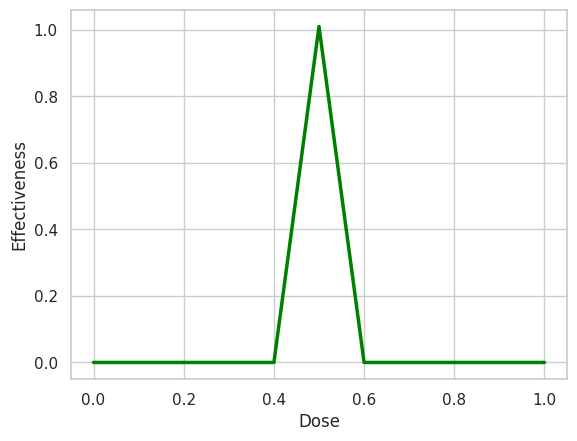

In [7]:
## create the neural network.
model = BasicLightning()

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## First, set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses,
             y=output_values,
             color='green',
             linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## optionally, save the graph as a PDF.
# plt.savefig('BasicLightning.pdf')

The graph shows that the neural network fits the training data. In other words, so far, we don't have any bugs in our code.
# Double BAM!!!

---

<a id="train"></a>
# Optimize (Train) a Parameter in the Neural Network and Graph the Output

Now that we know how to create and use a simple neural network, and we can graph the output relative to the input, let's see how to train a neural network. The first thing we need to do is tell **Lightning** which parameter (or parameters) we want to train, and we do that by setting `requires_grad=True`. In this example, we'll train `final_bias`.

In [8]:
## Create a neural network class that we can train by creating a class that inherits from LightningModule
##
## NOTE: This new class, BasicLightningTrain, contains two new methods for training:
##
## training_step() - This method takes care of 4 things:
##      a) calculates the loss for an epoch
##      b) resets the gradients
##      c) backpropagation
##      d) updates the parameters
## configure_optimizers() - defines the method we will use to optimize the model
class BasicLightningTrain(L.LightningModule):

    def __init__(self): # __init__() is the class constructor function, and we use it to initialize the weights and biases.

        ## NOTE: The code for __init__ () is the same as before except we now have a learning rate parameter (for
        ##       gradient descent) and we modified final_bias in two ways:
        ##           1) we set the value of the tensor to 0, and
        ##           2) we set "requires_grad=True".

        super().__init__() # initialize an instance of the parent class, LightningModule.

        ## The first thing we do is set the seed for the random number generorator.
        ## This ensures that when someone creates a model from this class, that model
        ## will start off with the exact same random numbers as I started out with when
        ## I created this demo. At least, I hope that is what happens!!! :)
        L.seed_everything(seed=42)

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        ## We want to modify final_bias to demonstrate how to optimize it with backpropagation.
        ## NOTE: The optimal value for final_bias is -16...
#         self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        ## ...so we set it to 0 and tell Pytorch that it now needs to calculate the gradient for this parameter.
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

        self.learning_rate = 0.01 ## this is for gradient descent. NOTE: we will improve this value later, so, technically
                       ## this is just a placeholder until then. In other words, we could put any value here
                       ## because later we will replace it with the improved value.


    def forward(self, input):

        ## forward() is the exact same as before

        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = (scaled_top_relu_output
                      + scaled_bottom_relu_output
                      + self.final_bias)

        output = F.relu(input_to_final_relu)

        return output # output is the predicted effectiveness for a drug dose.

    def configure_optimizers(self): # this configures the optimizer we want to use for backpropagation.
        return SGD(self.parameters(), lr=self.learning_rate) # NOTE: We set the learning rate (lr) to our new variable
                                      # self.learning_rate

    def training_step(self, batch, batch_idx): # take a step during gradient descent.

        ## NOTE: When training_step() is called it calculates the loss with the code below...
        input_i, label_i = batch # collect input
        output_i = self.forward(input_i) # run input through the neural network
        loss = (output_i - label_i)**2 ## loss = squared residual

        ##...before calling (internally and behind the scenes)...
        ## optimizer.zero_grad() # to clear gradients  後做
        ## loss.backward() # to do the backpropagation 先做
        ## optimizer.step() # to update the parameters 中間
        return loss

Now let's graph the output of `BasicLightningTrain`, which is currently not optimized, and compare it to the graph we drew earlier of the optimized neural network.

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Text(0.5, 0, 'Dose')

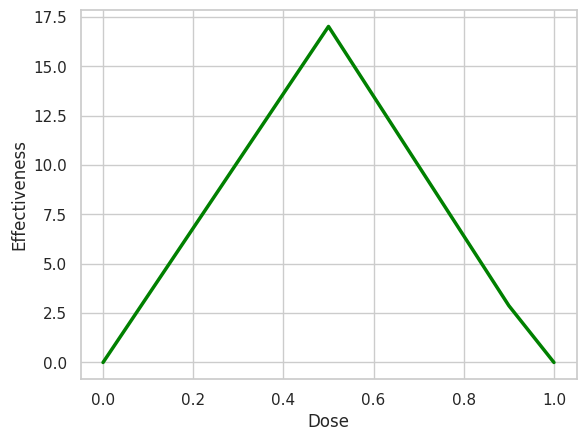

In [9]:
## create the neural network.
model = BasicLightningTrain()

## now run the different doses through the neural network.
output_values = model(input_doses)

## Now draw a graph that shows the effectiveness for each dose.
##
## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses,
       y=output_values.detach(), ## NOTE: because final_bias has a gradident, we call detach()
                      ## to return a new tensor that only has the value and not the gradient.
       color='green',
       linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
#plt.savefig('BasicLightningTrain.pdf')

The graph shows that when the dose is **0.5**, the output from the unoptimized neural network is **17**, which is way too high, since the output value should be **1**. So, now that we have a parameter we can optimize, let's create some training data that we can use to optimize it. **NOTE:** Instead of just jamming some tensors into our neural network for training, **Lightning** requires us to wrap the training data in a `DataLoader`, which provides a lot of nice features. For example, if we had a large dataset, a `DataLoader` gives us a super easy way to access the data in batches instead of all at once. This is critical when we have more data than RAM to store it in. A `DataLoader` can also shuffle the data for us each epoch and makes it easy to only use a fraction of the data if we want to do a quick and rough training for debugging purposes.

In [10]:
## create the training data for the neural network.
# inputs = torch.tensor([0., 0.5, 1.])
# labels = torch.tensor([0., 1., 0.])
## NOTE: Because we have so little data, and let's be honest, it's an unrealistically small
## amount of data, the learning rate algorithm, lr_find(), that we use in the next section has trouble.
## So, the point here is to show how to use lr_find() when you have a reasonable amount of data,
## which we fake here by making 100 copies of the inputs and labels.
inputs = torch.tensor([0., 0.5, 1.] * 100)
labels = torch.tensor([0., 1., 0.] * 100)

## If we want to use Lightning for training, then we have to pass the Trainer the data wrapped in
## something called a DataLoader. DataLoaders provide a handful of nice features including...
##   1) They can access the data in minibatches instead of all at once. In other words,
##      The DataLoader doesn't need us to load all of the data into memory first. Instead
##      it just loads what it needs in an efficient way. This is crucial for large datasets.
##   2) They can reshuffle the data every epoch to reduce model overfitting
##   3) We can easily just use a fraction of the data if we want do a quick train
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

And now that we have some training data, the first thing we need to do is find the optimal **Learning Rate** for gradient descent. We do this by creating a **Lightning** `Trainer` and using it to call `tuner.lr_find()` to find an improved learning rate.

In [11]:
model = BasicLightningTrain() # First, make model from the class

## Now create a Trainer - we can use the trainer to...
##  1) Find the optimal learning rate
##  2) Train (optimize) the weights and biases in the model
## By default, the trainer will run on your system's CPU
trainer = L.Trainer(max_epochs=20)
## However, if we wanted to automatically take advantage of any available GPUs,
## we would set accelerator="auto" to automatically use available GPUs
## and we would set devices="auto" to automatically select as many GPUs as we have.
#
# trainer = L.Trainer(max_epochs=34, accelerator="auto", devices="auto")

## Now let's find the optimal learning rate
tuner = L.pytorch.tuner.Tuner(trainer)
lr_find_results = tuner.lr_find(model,
                  train_dataloaders=dataloader, # the training data
                  min_lr=0.001, # minimum learning rate
                  max_lr=1.0,   # maximum learning rate
                  early_stop_threshold=None) # setting this to "None" tests all 100 candidate rates
# lr_find_results = trainer.tuner.lr_find(model,
#                   train_dataloaders=dataloader, # the training data
#                   min_lr=0.001, # minimum learning rate
#                   max_lr=1.0,   # maximum learning rate
#                   early_stop_threshold=None) # setting this to "None" tests all 100 candidate rates
new_lr = lr_find_results.suggestion() ## suggestion() returns the best guess for the optimal learning rate

## now print out the learning rate
print(f"lr_find() suggests {new_lr:.5f} for the learning rate.")

# now set the model's learning rate to the new value
model.learning_rate = new_lr

## NOTE: we can also plot the loss for each learning rate tested.
## When you have a lot of data, this graph can be useful
## (see https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html to learn how to interpret)
## but when you only have 3 data points, like our example, this plot is pretty hard to interpret so I did
## not cover it in the video.
# fig = lr_finder.plot(suggest=True)
# fig.show()

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.002137962089502232
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.002137962089502232
INFO: Restoring states from the checkpoint path at /content/.lr_find_a5b4dc71-1c04-41e9-92f9-d8d3ef47d827.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_a5b4dc71-1c04-41e9-92f9-d8d3ef47d827.ckpt
INFO: Restored all states from the checkpoint at /content/.lr_find_a5b4dc71-1c04-41e9-92f9-d8d3ef47d827.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_a5b4dc71-1c04-41e9-92f9-d8d3ef47d827.ckpt


lr_find() suggests 0.00214 for the learning rate.


Now that we have an improved training rate, let's train the model to optimize `final_bias`.

In [12]:
## Now that we have an improved learning rate, we can train the model (optimize final_bias)
trainer.fit(model, train_dataloaders=dataloader)

print(model.final_bias.data)

INFO: 
  | Name         | Type | Params
--------------------------------------
  | other params | n/a  | 7     
--------------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name         | Type | Params
--------------------------------------
  | other params | n/a  | 7     
--------------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


tensor(-16.0070)


So, if everything worked correctly, the optimizer should have converged on `final_bias = -16.0070`. **BAM!**

Lastly, let's graph the output from the optimized neural network and see if it's the same as what we started with. If so, then the optimization worked.

In [14]:
input_doses, output_values

(tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
         0.9000, 1.0000]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0030, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000], grad_fn=<ReluBackward0>))

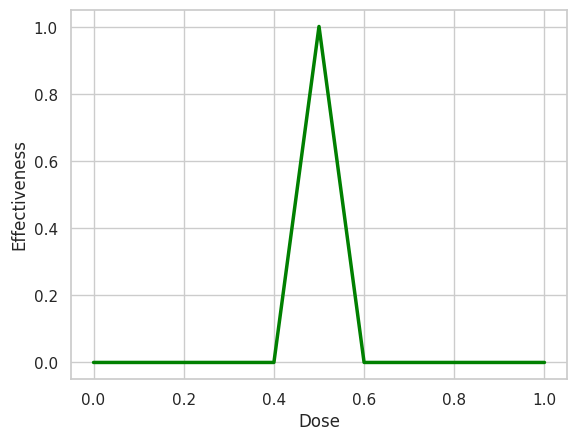

In [13]:
## run the different doses through the neural network
output_values = model(input_doses)

## set the style for seaborn so that the graph looks cool.
sns.set(style="whitegrid")

## create the graph (you might not see it at this point, but you will after we save it as a PDF).
sns.lineplot(x=input_doses,
       y=output_values.detach(), ## NOTE: we call detach() because final_bias has a gradient
       color='green',
       linewidth=2.5)

## now label the y- and x-axes.
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

## lastly, save the graph as a PDF.
plt.savefig('BasicLightningTrain_optimized.pdf')

And we see that the optimized model results in the same graph that we started with, so the optimization worked as expected.

[HOW TO: Insert Image in Google Colab Text Cell](https://www.youtube.com/watch?v=vlheEeZd6lY) (out of date!). However, the comment under the Video shows a useful solution.

```
I think the new process, at least for me, is that google gives you something like this:

https://drive.google.com/file/d/1YV2CtutL2bMX5sVc8zxwCm4WqWNJdmSA/view?usp=sharing

and you change it to this:

https://drive.google.com/uc?id=1YV2CtutL2bMX5sVc8zxwCm4WqWNJdmSA


meaning, you copy everything between the `/d` and the `/view/`, and you replace
everything after `https://drive.google.com/` with `uc?id=` and then paste in the id.
```
(Updated)把圖片上傳到Colab 的 Google Drive，把圖片的sharelink改成如下格式，圖片即可正常顯示




```
<img src="https://drive.google.com/uc?id=1c86HrlN5Am33HNHw566qK-JbehoX4iLr" alt="A simple Neural Network" style="width: 810px;">
```



# Triple BAM!!!

In [ ]:
# !tar xvf images.tar # 解壓縮